### Develop LSTM Models For Univariate Time Series Forecasting

In [39]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import layers
import pandas as pd
import statistics
import tensorflow as tf
import  matplotlib.pyplot as plt

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [6]:
df=pd.read_csv('gold_price_data.csv')

In [10]:
timeseries_data=df['Value'].values

In [12]:
timeseries_data=list(timeseries_data)

In [14]:
n_steps=15
X,y=prepare_data(timeseries_data,n_steps)

In [16]:
X.shape

(2913, 15)

In [17]:
# reshape from [samples, timesteps] into [samples, timesteps, features] # in Lstm is imp to reshape in 3 dim
n_features = 1  # 3 dimension
X = X.reshape((X.shape[0], X.shape[1], n_features))


### Building LSTM Model

In [20]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # output
model.compile(optimizer='adam', loss='mae')
# fit model
model.fit(X, y, epochs=600, verbose=1)


Epoch 1/600
92/92 [==============================] - 8s 22ms/step - loss: 435.3310
Epoch 2/600
92/92 [==============================] - 2s 22ms/step - loss: 217.3284
Epoch 3/600
92/92 [==============================] - 2s 22ms/step - loss: 64.7442
Epoch 4/600
92/92 [==============================] - 2s 22ms/step - loss: 59.5752
Epoch 5/600
92/92 [==============================] - 2s 23ms/step - loss: 61.0357
Epoch 6/600
92/92 [==============================] - 2s 23ms/step - loss: 28.1438
Epoch 7/600
92/92 [==============================] - 2s 23ms/step - loss: 26.5916
Epoch 8/600
92/92 [==============================] - 2s 22ms/step - loss: 25.3938
Epoch 9/600
92/92 [==============================] - 2s 23ms/step - loss: 25.3980
Epoch 10/600
92/92 [==============================] - 2s 23ms/step - loss: 25.1392
Epoch 11/600
92/92 [==============================] - 2s 23ms/step - loss: 24.9734
Epoch 12/600
92/92 [==============================] - 2s 23ms/step - loss: 70.8957
Epoch 13/60

### Predicting For the next 10 data

In [ ]:
# forecast = []

# # Use the model to predict data points per window size
# #model.predict(series[]
# for i in range(len(series) - window_size):
#   forecast.append(model.predict(series_1[i:i + window_size][np.newaxis]))
#   #print(i,model.predict(series[i:i + window_size][np.newaxis]))
# len(forecast)
# # Slice the points that are aligned with the validation set
# forecast = forecast[shp_i+1 - window_size:]

# # Compare number of elements in the predictions and the validation set
# #print(f'length of the forecast list: {len(forecast)}')
# #print(f'shape of the validation set: {x_valid.shape}')
# print(len(forecast))

In [55]:
X[-1].reshape(1,15,1).shape

(1, 15, 1)

In [56]:
X[-1]

array([[1643.3 ],
       [1671.65],
       [1650.3 ],
       [1634.9 ],
       [1652.  ],
       [1609.85],
       [1599.65],
       [1615.5 ],
       [1641.85],
       [1659.6 ],
       [1683.65],
       [1672.5 ],
       [1655.7 ],
       [1653.75],
       [1570.7 ]])

In [54]:
model.predict(X[0].reshape(1,15,1), verbose=0)

array([[825.0105]], dtype=float32)

In [86]:
import datetime
import psutil

# Check the system's virtual memory usage
memory = psutil.virtual_memory()
print("Total memory:", memory.total)
print("Used memory:", memory.used)
print("Free memory:", memory.free)

# Check the memory usage of the current process
process = psutil.Process()
print("Process memory usage:", process.memory_info().rss)

Total memory: 8379490304
Used memory: 6127439872
Free memory: 2252050432
Process memory usage: 652476416


In [87]:
# demonstrate prediction for next 10 days
start_time = datetime.datetime.now()
x_input = X[-1].reshape(1,15,1)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<180):
    
    if(len(temp_input)>n_steps):
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    
# end_time = datetime.datetime.now()
# duration = end_time - start_time
# print("Start time:", start_time)
# print("End time:", end_time)
# print("Duration:", duration)
memory = psutil.virtual_memory()
print("Total memory:", memory.total)
print("Used memory:", memory.used)
print("Free memory:", memory.free)

# Check the memory usage of the current process
process = psutil.Process()
print("Process memory usage:", process.memory_info().rss)

Total memory: 8379490304
Used memory: 6152105984
Free memory: 2227384320
Process memory usage: 706052096


### Duration of 6 month prediction 15 seconds

In [ ]:
timeseries_data

In [59]:
len(timeseries_data)

2928

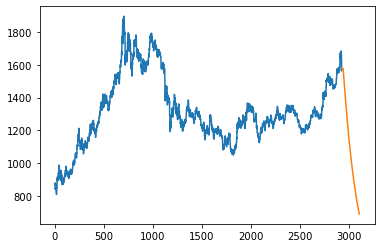

In [63]:
plt.plot(np.arange(0,2928),timeseries_data)
plt.plot(np.arange(2928,3108),lst_output)

In [65]:
timeseries_data.extend(lst_output)

### Visualizaing The Output

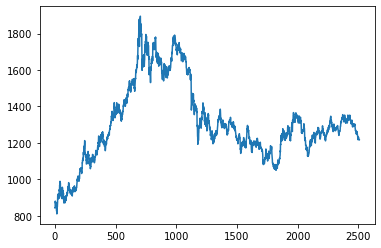

In [79]:
plt.plot(np.arange(0,2508),timeseries_data[:-600])

In [76]:
58-50

8

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

In [ ]:
day_new


In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
